In [191]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find consensus CpG nucleotides

In [132]:
n_consensus=40
OUTDIR = Path("/mnt/stripe/bio/experiments/aging/cpg_clock")
CPG_CLOCK_COEF_FILE = OUTDIR/"gb-2013-14-10-r115-S3.csv"

In [140]:
! head -n 5 {CPG_CLOCK_COEF_FILE}

In [138]:
! head -n 5 /mnt/stripe/bio/raw-data/aging/Y20O20/rrbs/data_1st_batch/chg.OD6.mincov10.txt

chrBase	chr	base	strand	coverage	freqC	freqT	nextBase
chr1.10517	chr1	10517	F	281	0.000	100.000	T
chr1.10502	chr1	10502	F	278	0.000	100.000	T
chr1.10524	chr1	10524	F	281	0.000	100.000	C
chr1.10541	chr1	10541	F	281	0.000	100.000	C


In [139]:
! head -n 5 /mnt/stripe/bio/raw-data/aging/loci_of_interest/cpg_clock_hg19.bed

chr15	74495354	74495355	cg00075967_STRA6	-
chr17	66303145	66303146	cg00374717_ARSG	+
chr12	80085268	80085269	cg00864867_PAWR	-
chr7	54827677	54827678	cg00945507_SEC61G	-
chr9	131842738	131842739	cg01027739_DOLPP1	+


In [14]:
%%bash -s "$OUTDIR"
#!/usr/bin/env bash

OUTDIR=$1
CPG_CLOCK_FILE=/mnt/stripe/bio/raw-data/aging/loci_of_interest/cpg_clock_hg19.bed
RRBS_DIR=/mnt/stripe/bio/raw-data/aging/Y20O20/rrbs

mkdir -p $OUTDIR
cd $OUTDIR

echo "Prepare files..."
for FILE in $(find ${RRBS_DIR} -wholename "*/data*.mincov10*.txt"); do
    FILE_NAME=${FILE##*/}
    BED="$OUTDIR/${FILE_NAME}.bed"
    if [ -f "${BED}" ]; then
        echo "Already exists: $BED"
    else
        echo "${FILE_NAME} --> ${BED} ..."
        cat ${FILE} | grep -v "base" | awk -v OFS='\t' '{if ($4=="F") strand="+"; else strand="-";  print $2,$3,$3+1,".",strand }' > ${BED}
    fi
done

echo "Each file intersection:"
REPORT="$OUTDIR/intersection_report.txt"
if [ ! -f $REPORT ]; then
    echo "Not exists: $REPORT"
    echo "" > ${REPORT}
    for FILE in $(find ${RRBS_DIR} -wholename "*/data*.mincov10*.txt"); do
        FILE_NAME=${FILE##*/}
        BED="$OUTDIR/${FILE_NAME}.bed"
        N=$(bedtools intersect -a ${CPG_CLOCK_FILE} -b ${BED} -wa | wc -l)
        echo "$FILE_NAME:$N"
        echo "$FILE_NAME:$N" >> "${REPORT}.tmp"
    done
    cat "${REPORT}.tmp" | sort > ${REPORT}
    rm  "${REPORT}.tmp"
else
    echo "Already exists: $REPORT"
fi

echo "Intersect all CpG files:"
REPORT="${OUTDIR}/cpg_clock_consensus.txt"
if [ ! -f $REPORT ]; then
    CPG_FILES=""
    for FILE in $(find ${RRBS_DIR} -wholename "*/data*cpg*.mincov10*.txt"); do
        FILE_NAME=${FILE##*/}
        BED="$OUTDIR/${FILE_NAME}.bed"
        CPG_FILES="$CPG_FILES $BED"
    done

    bedtools intersect -a ${CPG_CLOCK_FILE} -b ${CPG_FILES} -wa | sort -k1,1 -k2,2n | uniq -c > ${REPORT}
else
    echo "Already exists: $REPORT"
fi

echo "Strong consensus CpG: $(cat ${REPORT} | awk '{if ($1 >= 40) {print}}' | wc -l)"
echo "75% consensus CpG: $(cat ${REPORT} | awk '{if ($1 >= 30) {print}}' | wc -l)"
echo "Weak consensus CpG: $(cat ${REPORT} | awk '{if ($1 >= 2) {print}}' | wc -l)"
echo "[Done]"

Prepare files...
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chh.YD1.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chh.YD10.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chh.YD2.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD1.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD10.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD2.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD3.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD4.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD5.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD6.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/aging/cpg_clock/chg.OD7.mincov10.txt.bed
Already exists: /mnt/stripe/bio/experiments/ag

In [133]:
CPG_CLOCK_CONSENSUS_FILE=OUTDIR/"cpg_clock_consensus.txt"

In [427]:
! cat {OUTDIR}/intersection_report.txt

chg.OD10.mincov10.txt:0
chg.OD11.mincov10.txt:0
chg.OD12.mincov10.txt:0
chg.OD13.mincov10.txt:0
chg.OD14.mincov10.txt:0
chg.OD15.mincov10.txt:0
chg.OD16.mincov10.txt:0
chg.OD17.mincov10.txt:0
chg.OD18.mincov10.txt:0
chg.OD19.mincov10.txt:0
chg.OD1.mincov10.txt:0
chg.OD20.mincov10.txt:0
chg.OD2.mincov10.txt:0
chg.OD3.mincov10.txt:0
chg.OD4.mincov10.txt:0
chg.OD5.mincov10.txt:0
chg.OD6.mincov10.txt:0
chg.OD7.mincov10.txt:0
chg.OD8.mincov10.txt:0
chg.OD9.mincov10.txt:0
chg.YD10.mincov10.txt:0
chg.YD11.mincov10.txt:0
chg.YD12.mincov10.txt:0
chg.YD14.mincov10.txt:0
chg.YD15.mincov10.txt:0
chg.YD16.mincov10.txt:0
chg.YD17.mincov10.txt:0
chg.YD18.mincov10.txt:0
chg.YD19.mincov10.txt:0
chg.YD1.mincov10.txt:0
chg.YD20.mincov10.txt:0
chg.YD21.mincov10.txt:0
chg.YD2.mincov10.txt:0
chg.YD3.mincov10.txt:0
chg.YD4.mincov10.txt:0
chg.YD5.mincov10.txt:0
chg.YD6.mincov10.txt:0
chg.YD7.mincov10.txt:0
chg.YD8.mincov10.txt:0
chg.YD9.mincov10.txt:0
chh.OD10.mincov10.txt:0
chh.OD11.mincov10.txt:0
chh.OD12.m

In [317]:
! cat {OUTDIR}/cpg_clock_consensus.txt | cut -d 'c' -f 1 | sort | uniq -c | awk -v OFS='\t' '{{ print $$1, $$2 }}' > {OUTDIR}/cpg_clock_consensus.counts.tsv
! cat {OUTDIR}/cpg_clock_consensus.counts.tsv

5	1
2	2
1	3
2	5
1	15
1	18
1	21
1	24
1	25
1	26
1	28
2	35
4	37
3	38
4	39
32	40


   5   1
0  2   2
1  1   3
2  2   5
3  1  15
4  1  18


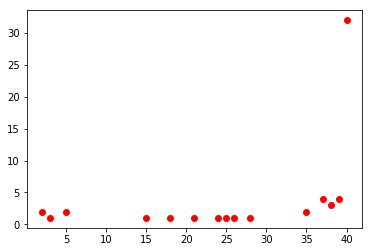

In [407]:
df_counts = pd.DataFrame.from_csv(OUTDIR/"cpg_clock_consensus.counts.tsv", sep="\t", index_col=None)
print(df_counts.head())
plt.plot(df_counts.iloc[:, 1].tolist(), df_counts.iloc[:, 0].tolist(), "ro")
plt.show()

In [192]:
%%bash -s "$CPG_CLOCK_COEF_FILE" "$CPG_CLOCK_CONSENSUS_FILE" "$n_consensus" "$OUTDIR"
echo "Args: $@"
CPG_CLOCK_COEF_FILE=$1
CPG_CLOCK_CONSENSUS_FILE=$2
N=$3
OUTDIR=$4

mkdir -p $OUTDIR
cd $OUTDIR

DETAILED_CONS="${OUTDIR}/cpg_clock_consensus.detailed.txt"
cat ${CPG_CLOCK_CONSENSUS_FILE} | awk -F'[\t_[:space:]]+' -v N="$N" -v OFS="\t" '{ if ($2 >= N) { print $3, $4, $5, $6, $8, $7, $2}}' > ${DETAILED_CONS}

# head -n 2 <(cat ${CPG_CLOCK_COEF_FILE} | grep "^cg" | awk -F',' -v OFS='\t' '{print $1, $2}' | sort -k1,1)
# head -n 2 <(sort -k4,4 ${DETAILED_CONS})

RESULT=${OUTDIR}/cpg_clock_consensus.coef.tsv
if [ -f $RESULT ]; then
    echo "Already processed: $RESULT"
else
    # -----------------
    # Consensus coefs:
    echo "" > $RESULT
    echo "chr"$'\t'"start"$'\t'"end"$'\t'"CoefficientTraining"$'\t'"strand"$'\t'"CpGmarker"$'\t'"Symbol"$'\t'"consensus" > $RESULT
    join -t $'\t' -1 1 -2 4 -o 2.1,2.2,2.3,1.2,2.5,1.1,2.6,2.7 <(cat ${CPG_CLOCK_COEF_FILE} | grep "^cg" | awk -F',' -v OFS='\t' '{print $1, $2}' | sort -k1,1) <(sort -k4,4 ${DETAILED_CONS}) >> ${RESULT}

    echo "Lines: $(wc -l ${RESULT})"
    echo "File head:"
    head -n 3 ${RESULT}  
    
    # -----------------
    # Each file coefs:
    RRBS_DIR=/mnt/stripe/bio/raw-data/aging/Y20O20/rrbs
    CONS_COEF_FILE=$OUTDIR/"cpg_clock_consensus.coef.tsv"

    echo "Each file intersection:"
    for FILE in $(find ${RRBS_DIR} -wholename "*/data*cpg*.mincov10*.txt"); do
        FILE_NAME=${FILE##*/}
        echo "Process: $FILE_NAME"

        RESULT="$OUTDIR/$FILE_NAME.coef.tsv"
        bedtools intersect -a <(cat $FILE | awk  -v OFS='\t' '{ if ($1 != "chrBase") { print $2, $3, $3+1, $5, $6}}') -b <(tail -n +2 $CONS_COEF_FILE) -wa -wb | awk -v OFS='\t' '{print $6, $7, $8, $9, $10, $11, $12, $13, $4, $5}' > $RESULT
    done
fi

Args: /mnt/stripe/bio/experiments/aging/cpg_clock/gb-2013-14-10-r115-S3.csv /mnt/stripe/bio/experiments/aging/cpg_clock/cpg_clock_consensus.txt 40 /mnt/stripe/bio/experiments/aging/cpg_clock
Already processed: /mnt/stripe/bio/experiments/aging/cpg_clock/cpg_clock_consensus.coef.tsv


In [193]:
df_coef = pd.DataFrame.from_csv(OUTDIR/"cpg_clock_consensus.coef.tsv", sep="\t", index_col='CpGmarker')
print(df_coef.shape)
df_coef.head()

(32, 7)


,chr,start,end,CoefficientTraining,strand,Symbol,consensus
CpGmarker,,,,,,,
cg02335441,chr3,130745948,130745949,-0.171285,-,ASTE1,40
cg03330058,chr3,127392403,127392404,-0.064471,+,ABTB1,40
cg04084157,chr7,100809049,100809050,1.034144,-,VGF,40
cg04528819,chr7,130418315,130418316,0.771798,-,KLF14,40
cg06557358,chr17,32907002,32907003,-0.141331,+,LOC124842,40


In [410]:
col_names = df_coef.columns.tolist() + ["n", "cFreq"]

results = []
for f in OUTDIR.glob("cpg.*.coef.tsv"):
    donor = f.name.split('.')[1]
    df = pd.DataFrame.from_csv(f, sep="\t", index_col=5, header=None)
    df.columns = col_names

    results.append((donor, np.sum(df["cFreq"]/100*df["CoefficientTraining"])))
    # results.append((donor, np.sum((1-df["cFreq"]/100)*df["CoefficientTraining"])))
results.sort(key=lambda x: x[0])
results

[('OD1', -0.31243035732191998),
 ('OD10', -0.44200793653297005),
 ('OD11', -0.58204556796181006),
 ('OD12', -0.32088450062521001),
 ('OD13', -0.20387389643327999),
 ('OD14', -0.23441976367497006),
 ('OD15', -0.20430318663875002),
 ('OD16', -0.46564667212594002),
 ('OD17', -0.50690963902612007),
 ('OD18', -0.36591656326942001),
 ('OD19', -0.27613471070819007),
 ('OD2', -0.33604345989272999),
 ('OD20', -0.41105887487384996),
 ('OD3', -0.47434963261562008),
 ('OD4', -0.29805748789493003),
 ('OD5', -0.33315253104662002),
 ('OD6', -0.23277568051068001),
 ('OD7', -0.36454918035295003),
 ('OD8', -0.26609271361235004),
 ('OD9', -0.27407174174556009),
 ('YD1', -0.38760412127122001),
 ('YD10', -0.37562555820903998),
 ('YD11', -0.39989980667770997),
 ('YD12', -0.50638511746963011),
 ('YD14', -0.43400322276930003),
 ('YD15', -0.48967754616505998),
 ('YD16', -0.45627371874833),
 ('YD17', -0.25616851461392004),
 ('YD18', -0.33527120587534998),
 ('YD19', -0.54618266741601995),
 ('YD2', -0.40389500395

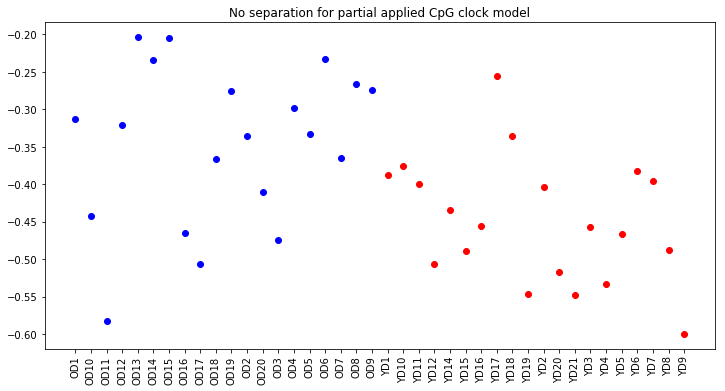

In [411]:
plt.figure(figsize=(12,6))
ods = [r for r in results if r[0].startswith("OD")]
yds = [r for r in results if r[0].startswith("YD")]

plt.plot(range(len(ods)), [v[1] for v in ods], 'bo')
plt.plot(range(len(ods), len(ods) + len(yds)), [v[1] for v in yds], 'ro')
plt.xticks(range(len(ods) + len(yds)), [v[0] for v in ods+yds], rotation='vertical')
plt.title("No separation for partial applied CpG clock model")

plt.show()

In [412]:
col_names = df_coef.columns.tolist() + ["n", "cFreq"]

results = []
for f in OUTDIR.glob("cpg.*.coef.tsv"):
    donor = f.name.split('.')[1]
    df = pd.DataFrame.from_csv(f, sep="\t", index_col=5, header=None)
    df.columns = col_names

    results.append((donor, (df["cFreq"]/100).tolist()))
results.sort(key=lambda x: x[0])

In [413]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

def plot(results, outliers=None, standardization=True, log1p=False):
    if outliers:
        # Outliers (german)
        results = [r for r in results if r[0] not in outliers]
    
    X = np.array([r[1] for r in results])
    
    if log1p:
        X = np.log1p(X)
        
    # Standardization
    if standardization:
        X = preprocessing.scale(X)

    donors_names = [r[0] for r in results]
    y = np.array([0 if d.startswith("OD") else 1 for d in donors_names])

    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)

    # Percentage of variance explained for each components
    print('explained variance ratio (first two components):', str(pca.explained_variance_ratio_))

    plt.figure()
    ax=plt.subplot()
    colors = ['blue', 'red']
    lw = 2

    ODS = y == 0
    YDS = y == 1
    ax.scatter(X_r[ODS, 0], X_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    ax.scatter(X_r[YDS, 0], X_r[YDS, 1] , color='red', alpha=.8, label='YD')


    for i, label in enumerate(donors_names):
        ax.annotate(label, xy=(X_r[i, 0], X_r[i, 1]),
                    fontsize=9, xytext=(5, 0),
                    textcoords='offset points', #ha='right', va='bottom'
                    color=colors[y[i]]
                   )
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('No separation on consensus CpG sits')
    plt.show()

No separation on PCA =( 

explained variance ratio (first two components): [ 0.10536003  0.08801017]


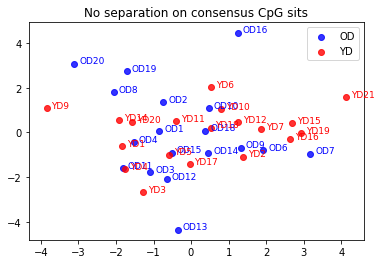

In [414]:
plot(results, outliers=["YD8", "OD17", "OD5"], standardization=True, log1p=False)

explained variance ratio (first two components): [ 0.12207908  0.09241323]


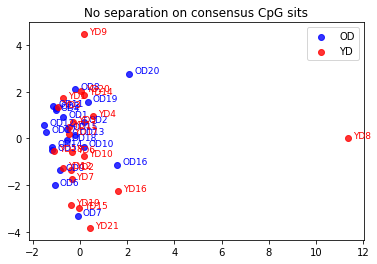

In [415]:
plot(results, outliers=None, standardization=True, log1p=False)

explained variance ratio (first two components): [ 0.23362642  0.17651521]


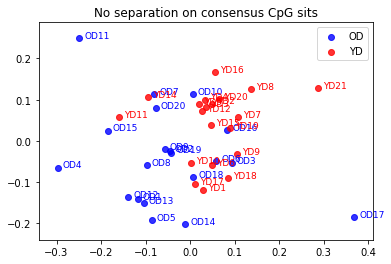

In [416]:
plot(results, outliers=None, standardization=False, log1p=False)

explained variance ratio (first two components): [ 0.10533194  0.08812707]


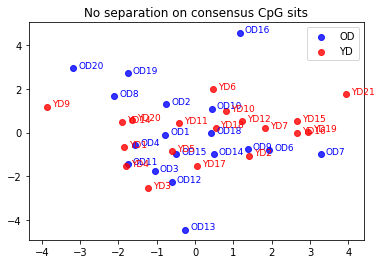

In [417]:
plot(results, outliers=["YD8", "OD17", "OD5"], standardization=True, log1p=True)

In [418]:
from sklearn.linear_model import LogisticRegression


def regression_check_for(results_train, results_test):
    print("Train [", len(results_train), "]:", [r[0] for r in results_train])
    print("Test [", len(results_test), "]:", [r[0] for r in results_test])

    def prepare_set(results):
        X = np.array([r[1] for r in results])
        X = preprocessing.scale(X)

        donors_names = [r[0] for r in results]
        y = np.array([0 if d.startswith("OD") else 1 for d in donors_names])
        return X, y, donors_names

    # train set:
    X_train, y_train, donors_train = prepare_set(results_train)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # lr.predict_proba(X[0])
    print("Mean accuracy training set:", lr.score(X_train, y_train))

    # test:
    X_test, y_test, donors_test = prepare_set(results_test)
    print("Mean accuracy test set:", lr.score(X_test, y_test))

    scores = lr.predict(X_test)
    print("Old:", [donors_test[i] for i, take in enumerate(scores == 0) if take])
    print("Young:", [donors_test[i] for i, take in enumerate(scores == 1) if take])    
    
# * test/train split by max donor id threshold: #12,18 best ;)
def regression_check(results, outliers, threshold):
    if outliers:
        results = [r for r in results if r[0] not in outliers ]
        
    results_train = [r for r in results if int(r[0].split("D")[1]) <= threshold]
    results_test = [r for r in results if int(r[0].split("D")[1]) > threshold]

    return regression_check_for(results_train, results_test)

In [419]:
regression_check(results, outliers=["YD8", "OD17", "OD5"], threshold=10)

Train [ 18 ]: ['OD1', 'OD10', 'OD2', 'OD3', 'OD4', 'OD6', 'OD7', 'OD8', 'OD9', 'YD1', 'YD10', 'YD2', 'YD3', 'YD4', 'YD5', 'YD6', 'YD7', 'YD9']
Test [ 19 ]: ['OD11', 'OD12', 'OD13', 'OD14', 'OD15', 'OD16', 'OD18', 'OD19', 'OD20', 'YD11', 'YD12', 'YD14', 'YD15', 'YD16', 'YD17', 'YD18', 'YD19', 'YD20', 'YD21']
Mean accuracy training set: 1.0
Mean accuracy test set: 0.578947368421
Old: ['OD12', 'OD13', 'OD14', 'OD15', 'OD19', 'YD11', 'YD14', 'YD17', 'YD18']
Young: ['OD11', 'OD16', 'OD18', 'OD20', 'YD12', 'YD15', 'YD16', 'YD19', 'YD20', 'YD21']


In [420]:
regression_check(results, outliers=["YD8", "OD17", "OD5"], threshold=12)

Train [ 22 ]: ['OD1', 'OD10', 'OD11', 'OD12', 'OD2', 'OD3', 'OD4', 'OD6', 'OD7', 'OD8', 'OD9', 'YD1', 'YD10', 'YD11', 'YD12', 'YD2', 'YD3', 'YD4', 'YD5', 'YD6', 'YD7', 'YD9']
Test [ 15 ]: ['OD13', 'OD14', 'OD15', 'OD16', 'OD18', 'OD19', 'OD20', 'YD14', 'YD15', 'YD16', 'YD17', 'YD18', 'YD19', 'YD20', 'YD21']
Mean accuracy training set: 1.0
Mean accuracy test set: 0.6
Old: ['OD13', 'OD14', 'OD15', 'OD19', 'YD14', 'YD17', 'YD18']
Young: ['OD16', 'OD18', 'OD20', 'YD15', 'YD16', 'YD19', 'YD20', 'YD21']


In [421]:
regression_check(results, outliers=["YD8", "OD17", "OD5"], threshold=18)

Train [ 32 ]: ['OD1', 'OD10', 'OD11', 'OD12', 'OD13', 'OD14', 'OD15', 'OD16', 'OD18', 'OD2', 'OD3', 'OD4', 'OD6', 'OD7', 'OD8', 'OD9', 'YD1', 'YD10', 'YD11', 'YD12', 'YD14', 'YD15', 'YD16', 'YD17', 'YD18', 'YD2', 'YD3', 'YD4', 'YD5', 'YD6', 'YD7', 'YD9']
Test [ 5 ]: ['OD19', 'OD20', 'YD19', 'YD20', 'YD21']
Mean accuracy training set: 1.0
Mean accuracy test set: 0.6
Old: ['OD19', 'YD19']
Young: ['OD20', 'YD20', 'YD21']


In [425]:
outliers=["YD8", "OD17", "OD5"]
results_ods = [r for r in results if r[0] not in outliers and r[0].startswith("OD")]
results_yds = [r for r in results if r[0] not in outliers and not r[0].startswith("OD")]
print("Ods:", len(results_ods), "Yds:", len(results_yds))
np.random.shuffle(results_ods)
np.random.shuffle(results_yds)
thr = 14
regression_check_for(results_ods[:thr]+results_yds[:thr], results_ods[thr:]+results_yds[thr:])

Ods: 18 Yds: 19
Train [ 28 ]: ['OD11', 'OD3', 'OD8', 'OD12', 'OD15', 'OD18', 'OD9', 'OD7', 'OD13', 'OD2', 'OD10', 'OD16', 'OD6', 'OD20', 'YD14', 'YD18', 'YD11', 'YD12', 'YD3', 'YD1', 'YD5', 'YD9', 'YD4', 'YD6', 'YD19', 'YD20', 'YD16', 'YD15']
Test [ 9 ]: ['OD1', 'OD19', 'OD14', 'OD4', 'YD17', 'YD2', 'YD7', 'YD10', 'YD21']
Mean accuracy training set: 1.0
Mean accuracy test set: 0.444444444444
Old: ['OD1', 'OD14', 'YD17', 'YD2', 'YD10']
Young: ['OD19', 'OD4', 'YD7', 'YD21']
